<a href="https://colab.research.google.com/github/otitamario/sp-pa-gep/blob/main/notebooks/exp2_linear_rate_strong_monotonicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Clone the repository into Colab runtime
!git clone https://github.com/otitamario/sp-pa-gep.git

# Move into repo root
%cd sp-pa-gep

# Make sure Python sees the project root
import sys
import os
sys.path.append(".")


Cloning into 'sp-pa-gep'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 62 (delta 17), reused 27 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 148.32 KiB | 6.74 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/content/sp-pa-gep/sp-pa-gep/sp-pa-gep


In [16]:
!git clone https://github.com/otitamario/sp-pa-gep.git
!cd sp-pa-gep


Cloning into 'sp-pa-gep'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 62 (delta 17), reused 27 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 148.32 KiB | 8.24 MiB/s, done.
Resolving deltas: 100% (17/17), done.


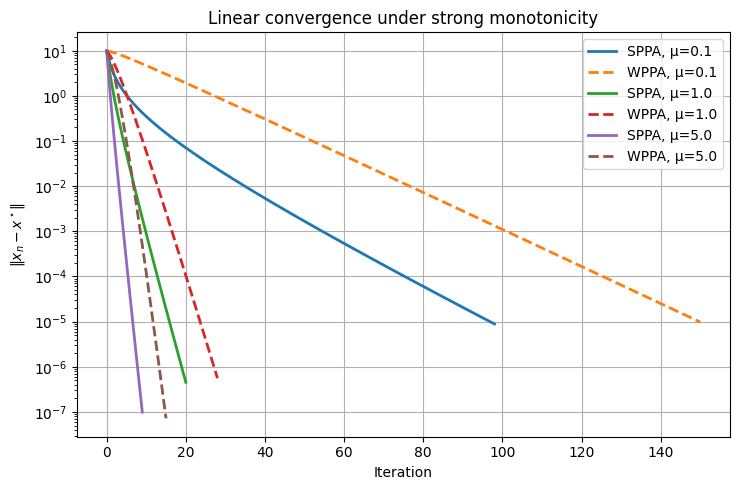

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import SPPA, WPPA
from src.utils import norm

# Dimension
n = 100

# Initial point and solution
x_star = np.zeros(n)
x0 = np.ones(n)

# Anchor point
u = np.zeros(n)

# Halpern / Mann parameters
N = 200
alpha_seq = [1.0 / (k + 2) for k in range(N)]

# Proximal parameter
r = 1.0

# Strong monotonicity parameters
mu_values = [0.1, 1.0, 5.0]

def resolvent_strong_monotone(mu):
    def S(x, r):
        return x / (1.0 + r * mu)
    return S

results_sppa = {}
results_wppa = {}

for mu in mu_values:
    S_mu = resolvent_strong_monotone(mu)

    hist_sppa = SPPA(x0, u, alpha_seq, r, S_mu)
    hist_wppa = WPPA(x0, alpha_seq, r, S_mu)

    err_sppa = [norm(x - x_star) for x in hist_sppa]
    err_wppa = [norm(x - x_star) for x in hist_wppa]

    results_sppa[mu] = err_sppa
    results_wppa[mu] = err_wppa

plt.figure(figsize=(7.5, 5))

for mu in mu_values:
    plt.semilogy(results_sppa[mu], label=f"SPPA, μ={mu}", linewidth=2)
    plt.semilogy(results_wppa[mu], linestyle="--", label=f"WPPA, μ={mu}", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel(r"$\|x_n - x^\star\|$")
plt.title("Linear convergence under strong monotonicity")
plt.legend()
plt.grid(True)
plt.tight_layout()

# SAVE FIRST
plt.savefig("figures/exp2_linear_rate_mu_comparison.png", dpi=300, bbox_inches="tight")

# THEN SHOW
plt.show()






In [ ]:
from google.colab import drive
drive.mount('/content/drive')